### Tests de entrenamiento para el conjunto de datos IRIS 

Importamos todas las librerias y modulos necesarios

In [1]:
from Neural_Network.layer import Layer
from data.load_data import load_iris_data
from Neural_Network.neural_network import NeuralNetwork
from sklearn.model_selection import train_test_split
from Neural_Network.preprocessing import preprocess_data
from Neural_Network.activations import softmax, softmax_derivate, relu, relu_derivate, tanh, tanh_derivate, sigmoid, sigmoid_derivate
from Neural_Network import optimizers
import numpy as np
from Neural_Network.visualizations import plot_confusion_matrix, roc_curve

Cargamos los datos de iris y preprocesamos los datos

In [2]:
X, y = load_iris_data() 
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjuntos de entrenamiento y prueba

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y agregamos capas a esta

In [4]:
nn = NeuralNetwork()
nn.add_layer(Layer(4, 5, activation_func=relu, activation_derivate=relu_derivate))
nn.add_layer(Layer(5, 3, activation_func=softmax, activation_derivate=softmax_derivate))

Evaluamos la precisión antes y después de entrenar la red neuronal

In [5]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test]))
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.5666666666666667
epoch   0 - Loss 0.94109, Accuracy 0.70833
epoch  10 - Loss 0.07581, Accuracy 1.00000
epoch  20 - Loss 0.01608, Accuracy 1.00000
epoch  30 - Loss 0.00604, Accuracy 1.00000
epoch  40 - Loss 0.00308, Accuracy 1.00000
epoch  50 - Loss 0.00180, Accuracy 1.00000
epoch  60 - Loss 0.00118, Accuracy 1.00000
epoch  70 - Loss 0.00081, Accuracy 1.00000
epoch  80 - Loss 0.00060, Accuracy 1.00000
epoch  90 - Loss 0.00046, Accuracy 1.00000
epoch 100 - Loss 0.00036, Accuracy 1.00000
epoch 110 - Loss 0.00030, Accuracy 1.00000
epoch 120 - Loss 0.00025, Accuracy 1.00000
epoch 130 - Loss 0.00021, Accuracy 1.00000
epoch 140 - Loss 0.00018, Accuracy 1.00000
epoch 150 - Loss 0.00015, Accuracy 1.00000
epoch 160 - Loss 0.00013, Accuracy 1.00000
epoch 170 - Loss 0.00012, Accuracy 1.00000
epoch 180 - Loss 0.00010, Accuracy 1.00000
epoch 190 - Loss 0.00009, Accuracy 1.00000
epoch 200 - Loss 0.00008, Accuracy 1.00000
epoch 210 - Loss 0.00007, Accuracy 1.00000
epoch 22

El accuracy después del entrenamiento es el siguiente:

In [6]:
Y_pred = [nn.feedforward(x) for x in X_test]
acc_model1 = NeuralNetwork.accuracy(y_test, Y_pred)
print("Accuracy after training (on test): ", acc_model1)

Accuracy after training (on test):  0.9


Ahora realizaremos la misma prueba pero añadiendo más capas y cambiando la función de activación

In [7]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(4, 20, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(20, 10, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(10, 6, activation_func=relu, activation_derivate=relu_derivate))
nn2.add_layer(Layer(6, 3, activation_func=softmax, activation_derivate=softmax_derivate))

In [8]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test]))
(acc2, loss2) = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.4
epoch   0 - Loss 0.00003, Accuracy 0.87500
epoch  10 - Loss 0.00002, Accuracy 1.00000
epoch  20 - Loss 0.00001, Accuracy 1.00000
epoch  30 - Loss 0.00000, Accuracy 1.00000
epoch  40 - Loss 0.00000, Accuracy 1.00000
epoch  50 - Loss 0.00000, Accuracy 1.00000
epoch  60 - Loss 0.00000, Accuracy 1.00000
epoch  70 - Loss 0.00000, Accuracy 1.00000
epoch  80 - Loss 0.00000, Accuracy 1.00000
epoch  90 - Loss 0.00000, Accuracy 1.00000
epoch 100 - Loss 0.00000, Accuracy 1.00000
epoch 110 - Loss 0.00000, Accuracy 1.00000
epoch 120 - Loss 0.00000, Accuracy 1.00000
epoch 130 - Loss 0.00000, Accuracy 1.00000
epoch 140 - Loss 0.00000, Accuracy 1.00000
epoch 150 - Loss 0.00000, Accuracy 1.00000
epoch 160 - Loss 0.00000, Accuracy 1.00000
epoch 170 - Loss 0.00000, Accuracy 1.00000
epoch 180 - Loss 0.00000, Accuracy 1.00000
epoch 190 - Loss 0.00000, Accuracy 1.00000
epoch 200 - Loss 0.00000, Accuracy 1.00000
epoch 210 - Loss 0.00000, Accuracy 1.00000
epoch 220 - Loss 0.0000

In [9]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9


Como podemos ver en los resultados, nos damos cuenta que el accuracy bajó en relación con el anterior modelo:

$$ \text{Accuracy}_{1ermodelo}=0.9$$

$$ \text{Accuracy}_{2domodelo}=0.9$$


Por lo que podemos llegar a la conclusión de que la neurona funciona bien aún poniendo más capas o cambiando las funciones de activación, aunque el primer modelo sigue siendo mejor al tener menos capas ocultas, si hacemos más pruebas podemos comprobarlo

### Test de entrenamiento del conjunto de datos DIGITS

Cargamos y preprocesamos los datos del conjunto de datos DIGITS

In [10]:
from data.load_data import load_digits_data
X, y = load_digits_data()
X, y = preprocess_data(X, y.reshape(-1, 1))

Dividimos los datos en conjunto de test y entrenamiento

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Inicializamos la red neuronal y entrenamos

In [12]:
nn = NeuralNetwork()
nn.add_layer(Layer(64, 5, activation_func=tanh, activation_derivate=tanh_derivate))
nn.add_layer(Layer(5, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [13]:
accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy before training: ", accuracy)
(acc1, loss1) = optimizers.gradient_descent(nn, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.14166666666666666
epoch   0 - Loss 2.01389, Accuracy 0.34375
epoch  10 - Loss 1.26487, Accuracy 0.61458
epoch  20 - Loss 1.63944, Accuracy 0.67014
epoch  30 - Loss 1.72320, Accuracy 0.72569
epoch  40 - Loss 2.14356, Accuracy 0.76736
epoch  50 - Loss 2.10963, Accuracy 0.78472
epoch  60 - Loss 2.15020, Accuracy 0.78819
epoch  70 - Loss 2.28043, Accuracy 0.78472
epoch  80 - Loss 2.39769, Accuracy 0.77778
epoch  90 - Loss 2.40791, Accuracy 0.78472
epoch 100 - Loss 2.09208, Accuracy 0.78125
epoch 110 - Loss 0.93739, Accuracy 0.79167
epoch 120 - Loss 0.17911, Accuracy 0.78125
epoch 130 - Loss 0.14457, Accuracy 0.78472
epoch 140 - Loss 0.12525, Accuracy 0.78819
epoch 150 - Loss 0.11122, Accuracy 0.79167
epoch 160 - Loss 0.09286, Accuracy 0.79167
epoch 170 - Loss 0.07645, Accuracy 0.78472
epoch 180 - Loss 0.07930, Accuracy 0.79167
epoch 190 - Loss 0.07238, Accuracy 0.79861
epoch 200 - Loss 0.05640, Accuracy 0.79514
epoch 210 - Loss 0.03819, Accuracy 0.79514
epoch 2

El accuracy final después de entrenar es el siguiente:

In [14]:
new_accuracy = NeuralNetwork.accuracy(y_test, [nn.feedforward(x) for x in X_test])
print("accuracy after training: ", new_accuracy)

accuracy after training:  0.8111111111111111


Como podemos observar, con este dataset el modelo entrena bien, obteniendo un accuracy del *81%*

Ahora vamos a probar añadiendo más capas y cambiando las funciones de activación

In [15]:
nn2 = NeuralNetwork()
nn2.add_layer(Layer(64, 32, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(32, 16, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(16, 8, activation_func=sigmoid, activation_derivate=sigmoid_derivate))
nn2.add_layer(Layer(8, 10, activation_func=softmax, activation_derivate=softmax_derivate))

In [16]:
print("accuracy before training: ", NeuralNetwork.accuracy(y_test, [nn2.feedforward(x) for x in X_test]))
(acc2, loss2) = optimizers.gradient_descent(nn2, X_train, y_train, NeuralNetwork.accuracy, epochs=500, learning_rate=0.01)

accuracy before training:  0.09722222222222222
epoch   0 - Loss 2.25873, Accuracy 0.21181
epoch  10 - Loss 0.52320, Accuracy 0.80903
epoch  20 - Loss 0.22304, Accuracy 0.88889
epoch  30 - Loss 0.13095, Accuracy 0.91667
epoch  40 - Loss 0.07893, Accuracy 0.93056
epoch  50 - Loss 0.05065, Accuracy 0.92708
epoch  60 - Loss 0.03416, Accuracy 0.92014
epoch  70 - Loss 0.02818, Accuracy 0.92014
epoch  80 - Loss 0.02554, Accuracy 0.92361
epoch  90 - Loss 0.02295, Accuracy 0.93403
epoch 100 - Loss 0.01972, Accuracy 0.93403
epoch 110 - Loss 0.01730, Accuracy 0.93750
epoch 120 - Loss 0.01549, Accuracy 0.93750
epoch 130 - Loss 0.01407, Accuracy 0.93750
epoch 140 - Loss 0.01291, Accuracy 0.93750
epoch 150 - Loss 0.01191, Accuracy 0.93750
epoch 160 - Loss 0.01092, Accuracy 0.93750
epoch 170 - Loss 0.01018, Accuracy 0.93750
epoch 180 - Loss 0.00956, Accuracy 0.93750
epoch 190 - Loss 0.00902, Accuracy 0.93750
epoch 200 - Loss 0.00853, Accuracy 0.93750
epoch 210 - Loss 0.00807, Accuracy 0.93750
epoch 2

In [17]:
Y_pred2 = [nn2.feedforward(x) for x in X_test]
acc_model2 = NeuralNetwork.accuracy(y_test, Y_pred2)
print("Accuracy after training (on test): ", acc_model2)

Accuracy after training (on test):  0.9583333333333334


Como se puede observar, en el segundo modelo se nota una clara mejoría con respecto al primero:

$$ \text{Accuracy}_{1ermodelo}=0.81$$

$$ \text{Accuracy}_{2domodelo}=0.95$$

Esto es debido probablemente al uso de otra función de activación.

Ahora para poder observar mejor que tan bien funcionó el segundo modelo dibujando la curva de roc

In [31]:
import numpy as np
import matplotlib.pyplot as plt

Y_pred1 = [np.argmax(nn.feedforward(x)) for x in X_test]  # Modelo 1
Y_pred2 = [np.argmax(nn2.feedforward(x)) for x in X_test]  # Modelo 2

y_test_labels = np.argmax(y_test, axis=1)  # Convertir a etiquetas de clase


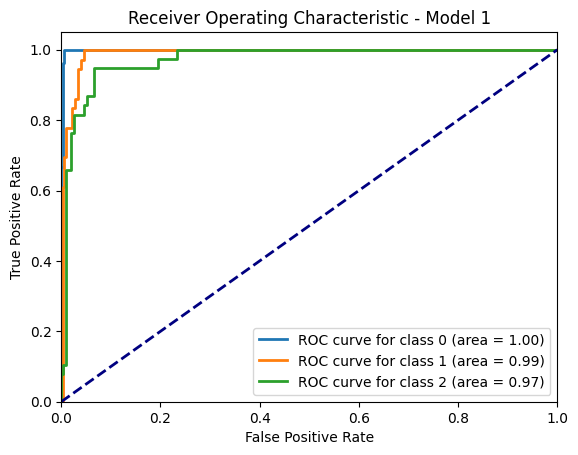

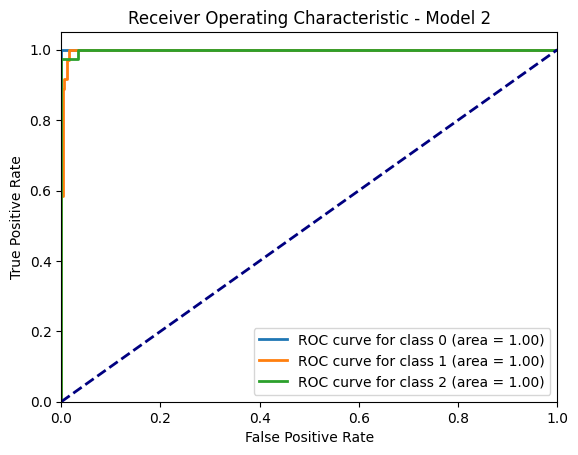

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test_labels, classes=[0, 1, 2])  # Ajusta según el número de clases
n_classes = y_test_bin.shape[1]

y_score1 = np.array([nn.feedforward(x) for x in X_test])  # Probabilidades de cada clase

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score1[:, i])  # Calcula la curva ROC
    roc_auc = auc(fpr, tpr)  # Calcula el AUC
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Model 1')
plt.legend(loc="lower right")
plt.show()

y_score2 = np.array([nn2.feedforward(x) for x in X_test])  # Probabilidades de cada clase

plt.figure()
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score2[:, i])  # Calcula la curva ROC
    roc_auc = auc(fpr, tpr)  # Calcula el AUC
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Model 2')
plt.legend(loc="lower right")
plt.show()
